First we're going to import relevant libraries and load our data:

In [101]:
import pandas as pd
raw = pd.read_csv('C:\\Users\Selfisher\Desktop\data.csv', '\t') 
# read more about this data in the readme file

In [102]:
raw.head() # Let's see how the data looks like

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


<AxesSubplot:>

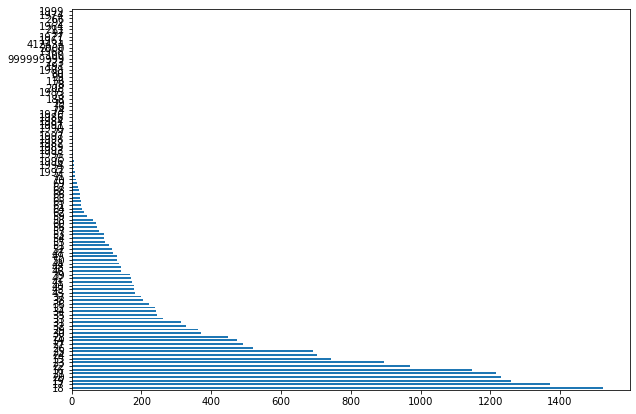

In [103]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7)) 
# some people enterd their year of birth by accidant

In [104]:
raw.loc[raw['age']>1900, 'age'] = 2012 - raw.loc[raw['age']>1900, 'age']

<AxesSubplot:>

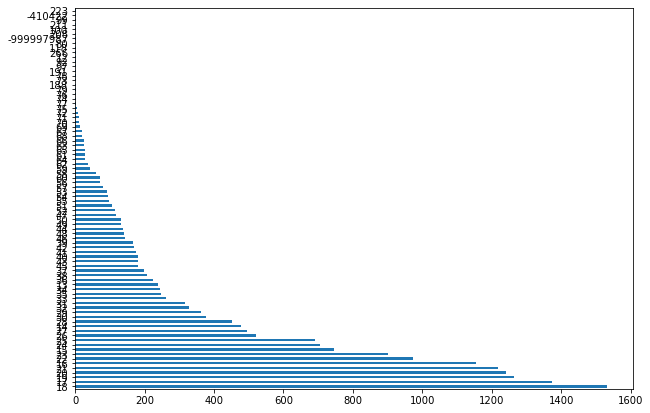

In [105]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7)) 
# fixed some of it, but some still dont make sense

In [106]:
raw = raw[raw.age < 100]
raw = raw[raw.age >= 15]

<AxesSubplot:>

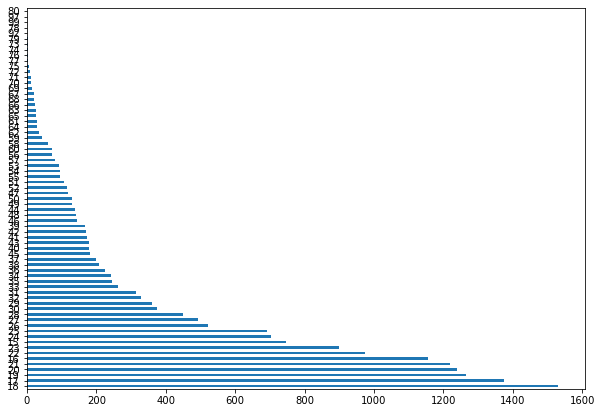

In [107]:
raw['age'].value_counts().plot(kind='barh',figsize=(10,7))
# now only truthful subjects are included

In [108]:
raw = raw.drop('age', axis=1).drop('engnat', axis=1).drop('race', axis=1).drop('hand', axis=1).drop('source', axis=1)
# droping these columns for now, but the country column might be relevant

In [109]:
raw.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,US,4,2,5,2,5,1,4,3,...,4,1,3,1,5,1,4,2,5,5
1,2,US,2,2,3,3,3,3,1,5,...,3,3,3,3,2,3,3,1,3,2
3,2,RO,2,5,2,4,3,4,3,4,...,4,3,5,2,4,2,5,2,5,5
4,2,US,3,1,3,3,3,1,3,1,...,3,1,1,1,3,1,3,1,5,3
5,2,US,1,5,2,4,1,3,2,4,...,4,2,1,3,3,5,5,4,5,3


In [110]:
countries = pd.DataFrame(raw['country'].value_counts())
countries.median() # there are alot of countries with very few subjects

country    10.0
dtype: float64

In [111]:
countries = countries.loc[countries['country'] >= 500]
countries.median()

country    1176.5
dtype: float64

In [112]:
len(countries) # so we're left with 6 countries

6

In [113]:
raw = raw.loc[raw['country'].isin(countries.index)] # keep only those countries

In [114]:
len(raw['country'].value_counts()) # seems like it worked!

6

Now the problem is that most skl algorithms dont know how to use strings for their predictions. So, we will split
the column 'country' into 6 columns of countries which will contain ones and zeros:
one if the subject is from the column's name (country)
or zero if not.
in each row there sould be exactly one "1".

In [115]:
raw['country'].str.get_dummies() # most of the subjects are from the US

,AU,CA,GB,IN,PH,US
0,0,0,0,0,0,1
1,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
...,...,...,...,...,...,...
19712,0,0,0,0,0,1
19713,0,0,0,0,0,1
19715,0,0,0,0,0,1
19716,0,0,0,0,0,1


In [116]:
n_data = raw.join(raw['country'].str.get_dummies(), how='right') # combining the two data frames into a n_data

In [117]:
n_data.head()

,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,US,4,2,5,2,5,1,4,3,...,4,2,5,5,0,0,0,0,0,1
1,2,US,2,2,3,3,3,3,1,5,...,3,1,3,2,0,0,0,0,0,1
4,2,US,3,1,3,3,3,1,3,1,...,3,1,5,3,0,0,0,0,0,1
5,2,US,1,5,2,4,1,3,2,4,...,5,4,5,3,0,0,0,0,0,1
6,2,US,5,1,5,1,5,1,5,4,...,4,3,3,4,0,0,0,0,0,1


In [118]:
n_data = n_data.drop('country', axis=1) # we ahve no use for the 'country' column now

In [119]:
n_data.head() 

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,1,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,2,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,2,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,2,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,2,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [120]:
n_data['gender'] = n_data['gender'] - 1 # now 1 is female and 0 is male

In [121]:
n_data['gender'].value_counts()

 1    8543
 0    5057
 2      68
-1      18
Name: gender, dtype: int64

In [122]:
n_data = n_data.loc[n_data['gender']!=2] # 3 was "other"

In [123]:
n_data = n_data.loc[n_data['gender']!=-1] # 0 was "rather not say"

In [124]:
n_data['gender'].value_counts() # now it's binary

1    8543
0    5057
Name: gender, dtype: int64

In [125]:
n_data.head(5)

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O7,O8,O9,O10,AU,CA,GB,IN,PH,US
0,0,4,2,5,2,5,1,4,3,5,...,4,2,5,5,0,0,0,0,0,1
1,1,2,2,3,3,3,3,1,5,1,...,3,1,3,2,0,0,0,0,0,1
4,1,3,1,3,3,3,1,3,1,3,...,3,1,5,3,0,0,0,0,0,1
5,1,1,5,2,4,1,3,2,4,1,...,5,4,5,3,0,0,0,0,0,1
6,1,5,1,5,1,5,1,5,4,4,...,4,3,3,4,0,0,0,0,0,1


In [126]:
from sklearn.utils import shuffle

In [127]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [128]:
n_data = shuffle(n_data)

In [129]:
to = 2000
train = n_data[:to]
test = n_data[to:]

In [130]:
trainx = train.drop('gender',axis=1)
trainy = train['gender']

In [131]:
import sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB
# best we got is 0.64 accuracy for 0.65 male to female ratio - not good


In [132]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier#binarize=1.6-for power trick.binarize=.65-no trick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [133]:
reg = linear_model.LogisticRegression() 

In [134]:
reg

LogisticRegression()

In [135]:
reg = linear_model.LinearRegression() 
# this model can't use binary data. coutry of origin in this case

In [136]:
reg = KNeighborsClassifier(n_neighbors=40) 

In [137]:
reg = linear_model.RidgeClassifierCV() # best so far - we got a 0.75 f1 score

In [148]:
scrs = [] 
n_to = int(to/3)
tms = 100
for i in range(tms):
    train = shuffle(train) # shuffling the train DF
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    reg.fit(trainx[:n_to],trainy[:n_to])
    output = reg.predict(trainx[n_to:])
    scrs.append(sklearn.metrics.f1_score(trainy[n_to:], output)) # adding the f1 score to the list
sum(scrs)/tms 

0.6611703250305954

In [150]:
scrs = []
g_rate = [] # this will later tell us what the female to male ratio was when the prediction took place
tms = 50
for i in range(tms):
    train = shuffle(train)
    trainx = train.drop('gender',axis=1)
    trainy = train['gender']
    scrs.append(cross_val_score(reg, trainx, trainy, cv=5).mean())
print('Accuracy avg: ', sum(scrs) / len(scrs))
print('Female percentage: ', len(train.loc[train['gender'] == 1]) / 2000)
dif = abs((sum(scrs) / len(scrs))- (len(train.loc[train['gender'] == 1]) / 2000))
print('Difference: ',dif)
df_ovr_mlp = dif / (1-(len(train.loc[train['gender'] == 1]) / 2000))
print('Difference over male percentage: ', df_ovr_mlp)
# this shows us the difference between the avg of the accuracy and the avg of the female to male ratio in those tests
# so the number we see is the number of percents the model is more acuurate than just guessing 'female' every time

Accuracy avg:  0.6713999999999998
Female percentage:  0.4995
Difference:  0.17189999999999978
Difference over male percentage:  0.34345654345654303


In [144]:
from matplotlib import pyplot as plt
import seaborn as sns

In [145]:
mal = n_data.loc[n_data['gender']==0]
fem = n_data.loc[n_data['gender']==1][:len(mal)]
plot_d = fem.append(mal) 
# making new DataFrame that has a 1:1 femal to male ratio so the info we get will not be bias

In [146]:
len(fem)
plot_d = shuffle(plot_d)
train=plot_d[:to]

In [125]:
len(mal)

5057

Now we're looking for information to see which question should get more or less weight

In [157]:
chrs = {'O','C','E','A','N'}
qs = []
diff = []
for c in chrs:
    #print(c+' : ')
    for i in range(10):
        s = c+str(i+1)
        #print(s+' : '+str(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean())))
        qs.append(s)
        diff.append(abs(plot_d.loc[plot_d['gender']==0][s].mean()-plot_d.loc[plot_d['gender']==1][s].mean()))

<AxesSubplot:title={'center':'Differences in Qusetions'}>

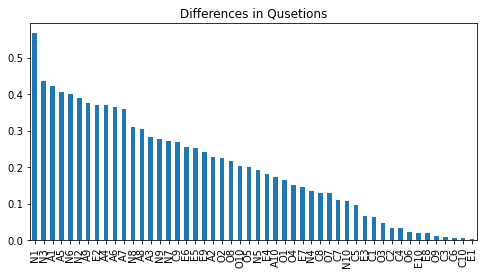

In [185]:
pd.DataFrame(diff,qs).sort_values(by=0,ascending=False).plot(kind='bar',figsize=(8,4),legend=False, title='Differences in Qusetions')
#Some questions are more important than others. Let's use that:

In [186]:
#for i in range(len(diff)):
#    if diff[i] < 0.05:
#        n_data = n_data.drop(qs[i], axis=1)

<AxesSubplot:>

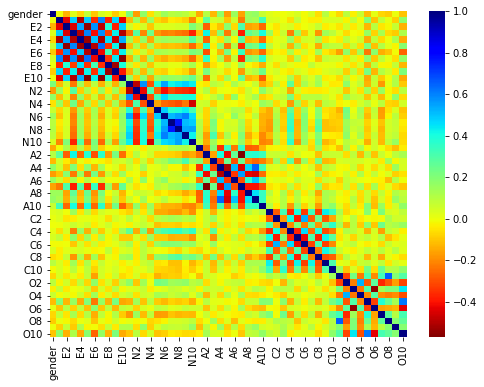

In [196]:
ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(n_data.iloc[:, 0:51].corr(), cmap='jet_r')
# each personality trait is heavily corellated to itself, but not to other traits as expect. 
# this means that the data is valid

In [173]:
#n_data.corr()#['gender'].sort_values() # another way of seeing which questions are more coorelated with gender 

In [50]:
params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]    
}
from sklearn.model_selection import GridSearchCV

In [51]:
GridSearchCV(estimator = reg, param_grid=params)

GridSearchCV(estimator=RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [47]:
params

{'alphas': array([ 0.1,  1. , 10. ]),
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}